# Approach
The general approach for this problem was to apply a Monte Carlo algorithm to solve a grayed out area on a provided visual. The visual has a circle of a radius 1 circumscribed in 2x2 square overlapping with a quarter of a radius 2 circle who's origin is at 0,0. This essentially threw darts at the photo and measured whether or not they fall into these regions by mapping these equations.

A more practical approach would be intgeration of lines but Monte Carlo works fine. The conditional only accounts for the bottom/left grey region because my conditional was having an issue with the top region. This made me just double the sample size and then do a 50/50 on which region it would be placed in providing the same numbers.

The code is really straightforward and just checks a bulky conditional on whether or not a point falls in the bottom left region and if it is, it increments a pointer and adds it to an array or coordinates.

In [1]:
from random import random
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (3, 3)

In [2]:
def findArea(samples=1000, plot=False):
    inside, coords = 0, []
    for i in range(samples*2):
        i, j = random()*2, random()*2
        if (
            (i >= 1 and j >= 1 and sqrt(i**2 + j**2) >= 2 and sqrt((1-i)**2 + (1-j)**2) <= 1) or (
            sqrt((2-i)**2 + (2-j)**2) >= 2 and (
            (i <= 1 and j <= 1 and sqrt((1-i)**2 + (1-j)**2) <= 1) or
            (i >= 1 and j <= 1 and sqrt((i-1)**2 + (1-j)**2) <= 1) or
            (i <= 1 and j >= 1 and sqrt((1-i)**2 + (j-1)**2) <= 1)
        ))):
            if 2 - j >= i:
                inside += 1
                coords.append([i, j] if np.random.choice([True, False]) else [2-i, 2-j])
    x, y = np.array(coords).T
    plt.scatter(x, y)
    plt.show()
    return inside*4/samples

# Results
Below are the results of 4 of differing sample sizes (n=100, 1000, 10000, 100000). Each scatter plot displayed below shows the distribution of random points that fall within the gray regions on the provided visual. Each of these calculate the area by finding the percentage of points that fall within the region divided by the total amount of points. Using these points, I got the area of 1.17424 out of 4 total area of the square.

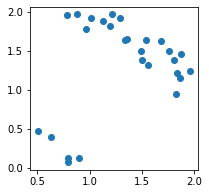

1.08


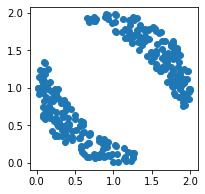

1.18


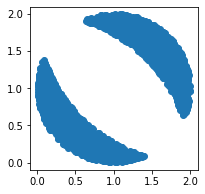

1.1516


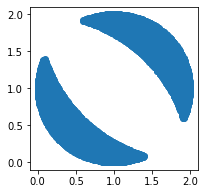

1.17424


In [3]:
print(findArea(100, True))
print(findArea(1000, True))
print(findArea(10000, True))
print(findArea(100000, True))